# Jupyter Notebooks - part 2
* ### Data analysis and visualization

In this lesson you will learn 
- to do some data analysis using pandas
 - The important concept of *tidy* data
- to produce nice plots with seaborn
- how other types of media can be embedded in a notebook

## Exploratory data analysis in Jupyter

We will use four important Python packages
1. `numpy` is the fundamental package for scientific computing with Python
 - for the purposes of this notebook `numpy` is like the engine of a car, it's under the hood running the show
2. `pandas` is a more recently developed package for data manipulation and analysis 
 - powerful high-level tool for data exploration
 - two fundamental data structures which can be applied to many types of data: `Series` and `DataFrames`  

3. `matplotlib` is the standard Python package for plotting, "grandfather of all Python visualization packages"
4. `seaborn` is a higher-level visualization package based on `matplotlib`
 - while `matplotlib` is extremely powerful, it can also be complex. 
 - sometimes much effort needed to get good-looking graphs
 - default visualization much more appealing compared to `matplotlib`

We will download and process a dataset on Nobel prizes. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pandas defines a `read_csv` function that can read any CSV file. By giving the URL to the file, pandas will automatically download and parse the file, and return a `DataFrame` object. We need to specify a few options to make sure the dates are parsed correctly.

In [4]:
# dataset from http://oppnadata.se/en/dataset/nobel-prizes/resource/f3da8ba9-a17f-4911-9003-4bcef93619cc
nobel = pd.read_csv("data/nobels.csv")

The `nobel` variable now contains a `DataFrame` object, a Pandas data structure that contains 2D tabular data. The `head(n)` method displays the first `n` rows of this table.

In [5]:
nobel.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


Each column (and row) of the `DataFrame` is a `Series`. Series can be accessed by their names as follows.

In [6]:
nobel["year"]

0      1901.0
1      1902.0
2      1902.0
3      1903.0
4      1903.0
5      1903.0
6      1911.0
7      1904.0
8      1905.0
9      1906.0
10     1907.0
11     1908.0
12     1909.0
13     1909.0
14     1910.0
15     1911.0
16     1912.0
17     1913.0
18     1914.0
19     1915.0
20     1915.0
21     1917.0
22     1918.0
23     1919.0
24     1920.0
25     1921.0
26     1922.0
27     1923.0
28     1924.0
29     1925.0
        ...  
943    2014.0
944    2014.0
945    2014.0
946    2014.0
947    2014.0
948    2014.0
949    2014.0
950    2014.0
951    2015.0
952    2015.0
953    2015.0
954    2015.0
955    2015.0
956    2015.0
957    2015.0
958    2015.0
959    2015.0
960    2015.0
961    2015.0
962    2016.0
963    2016.0
964    2016.0
965    2016.0
966    2016.0
967    2016.0
968    2016.0
969    2016.0
970    2016.0
971    2016.0
972    2016.0
Name: year, Length: 973, dtype: float64

In [7]:
type(nobel["year"])

pandas.core.series.Series

A Series object can produce statistical information about the datums in it.

In [8]:
nobel["share"].describe()

count    967.000000
mean       2.002068
std        0.929166
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: share, dtype: float64

It's also somewhat smart about the contents of the data it sees so it can summarize non-numerical data as well.

In [9]:
nobel["bornCountryCode"].describe()

count     941
unique     76
top        US
freq      275
Name: bornCountryCode, dtype: object

If you call a method on the dataframe like count, it will call the same method on each of the series.

In [10]:
nobel.count()

id                   973
firstname            967
surname              937
born                 973
died                 973
bornCountry          941
bornCountryCode      941
bornCity             939
diedCountry          603
diedCountryCode      602
diedCity             597
gender               973
year                 967
category             967
overallMotivation     16
share                967
motivation           879
name                 720
city                 714
country              714
dtype: int64

The dataset is clearly not quite complete, especially in the death statistics. Possibly because the laureates are still alive?

We can also use the function `describe()` to request statistics for the entire dataframe but then it will only give statistics for the numerical variables.

In [11]:
nobel.describe()

,id,year,share
count,973.000000,967.00000,967.000000
mean,471.872559,1970.19545,2.002068
std,275.324029,32.90862,0.929166
min,1.000000,1901.00000,1.000000
25%,231.000000,1947.00000,1.000000
50%,464.000000,1976.00000,2.000000
75%,721.000000,1999.00000,3.000000
max,937.000000,2016.00000,4.000000


To calculate some more elaborate statistics, we first add a column (one Nobel prize per laureate). This will add the column "number" to the dataframe with the value 1 for each row.

In [12]:
nobel["number"] = 1

### Age statistics

Let's first look at statistics based on the age of prize recipients.  
We need to convert the "born" column to datetime format. Datetimes are hardly ever recognized correctly.

In [13]:
type(nobel["born"][0])

str

In [14]:
nobel["born"] = pd.to_datetime(nobel["born"], errors ='coerce')
# coercion is necessary because the data is a bit messy

In [15]:
type(nobel["born"][0])

pandas._libs.tslib.Timestamp

In [16]:
nobel["born"].dt.year

0      1845.0
1      1853.0
2      1865.0
3      1852.0
4      1859.0
5      1867.0
6      1867.0
7      1842.0
8      1862.0
9      1856.0
10     1852.0
11     1845.0
12     1874.0
13     1850.0
14     1837.0
15     1864.0
16     1869.0
17     1853.0
18     1879.0
19     1862.0
20     1890.0
21     1877.0
22     1858.0
23     1874.0
24     1861.0
25     1879.0
26     1885.0
27     1868.0
28     1886.0
29     1882.0
        ...  
943    1960.0
944    1962.0
945    1962.0
946    1953.0
947    1945.0
948    1954.0
949    1997.0
950    1953.0
951    1930.0
952    1935.0
953    1930.0
954    1959.0
955    1943.0
956    1938.0
957    1946.0
958    1946.0
959    1948.0
960       NaN
961    1945.0
962    1945.0
963    1934.0
964    1951.0
965    1943.0
966    1944.0
967    1942.0
968    1951.0
969    1951.0
970    1948.0
971    1949.0
972    1941.0
Name: born, Length: 973, dtype: float64

We can now add a column to the DataFrame with age when prize was received.

In [17]:
nobel["age"] = nobel["year"] - nobel["born"].dt.year
nobel[["surname","age"]].head(10)
#print(nobel["age"].to_string())

,surname,age
0,Röntgen,56.0
1,Lorentz,49.0
2,Zeeman,37.0
3,Becquerel,51.0
4,Curie,44.0
5,"Curie, née Sklodowska",36.0
6,"Curie, née Sklodowska",44.0
7,(John William Strutt),62.0
8,von Lenard,43.0
9,Thomson,50.0


We can now plot a histogram of the age at which laureates receive their prize, using the inbuilt matplotlib support of pandas 

In [18]:
nobel.plot?

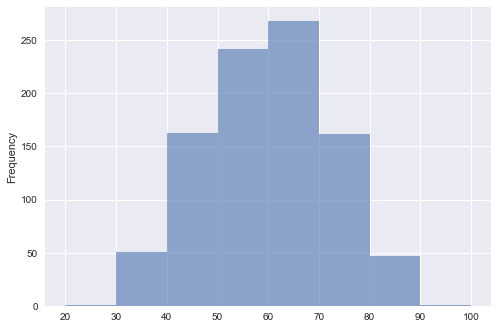

In [19]:
nobel["age"].plot.hist(bins=[20,30,40,50,60,70,80,90,100],alpha=0.6);

To extract the numbers, use the value_counts method

In [20]:
nobel["age"].value_counts(bins=[20,30,40,50,60,70,80,90,100])

(60.0, 70.0]      258
(50.0, 60.0]      251
(40.0, 50.0]      177
(70.0, 80.0]      150
(30.0, 40.0]       60
(80.0, 90.0]       38
(19.999, 30.0]      1
(90.0, 100.0]       0
Name: age, dtype: int64

An alternative plot that is is better for comparing distributions is the box plot.

The "by" keyword tells by which value the the observations should be **grouped by**, which is the next topic.

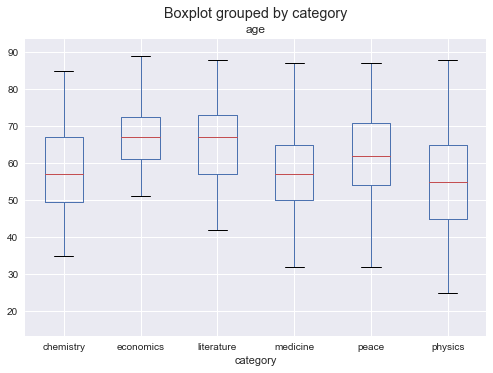

In [21]:
nobel.boxplot(column="age", by="category")

### Country statistics - groupby

We use the powerful `groupby` method to split data into groups, select the column "number", and sum up to get the total sum of Nobel prizes by country 

In [22]:
nobels_by_country = nobel.groupby('bornCountry',sort=True)["number"].sum()


In [23]:
nobels_by_country.describe()

count    121.000000
mean       7.776860
std       27.226974
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      275.000000
Name: number, dtype: float64

The pandas Series only shows a limited number of rows. Let's print them all

In [24]:
print(nobels_by_country.to_string())

bornCountry
Argentina                                           4
Australia                                          11
Austria                                            15
Austria-Hungary (now Austria)                       2
Austria-Hungary (now Bosnia and Herzegovina)        1
Austria-Hungary (now Croatia)                       1
Austria-Hungary (now Czech Republic)                4
Austria-Hungary (now Hungary)                       3
Austria-Hungary (now Poland)                        1
Austria-Hungary (now Slovenia)                      1
Austria-Hungary (now Ukraine)                       1
Austrian Empire (now Austria)                       2
Austrian Empire (now Czech Republic)                1
Austrian Empire (now Italy)                         1
Bavaria (now Germany)                               1
Belgium                                             9
Bosnia (now Bosnia and Herzegovina)                 1
Brazil                                              1
British India (n

How many prizes have people born in Sweden received?

In [25]:
nobels_by_country["Sweden"]

29

Who were they?

In [26]:
nobel.loc[nobel['bornCountry'] == "Sweden"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,year,category,overallMotivation,share,motivation,name,city,country,number,age
16,17,Nils Gustaf,Dalén,1869-11-30 00:00:00,1937-12-09,Sweden,SE,Stenstorp,Sweden,SE,...,1912.0,physics,NaN,1.0,"""for his invention of automatic regulators for...",Swedish Gas-Accumulator Co.,Lidingö-Stockholm,Sweden,1,43.0
28,29,Karl Manne Georg,Siegbahn,1886-12-03 00:00:00,1978-09-26,Sweden,SE,Lund,Sweden,SE,...,1924.0,physics,NaN,1.0,"""for his discoveries and research in the field...",Uppsala University,Uppsala,Sweden,1,38.0
95,91,Hannes Olof Gösta,Alfvén,1908-05-30,1995-04-02,Sweden,SE,Norrköping,Sweden,SE,...,1970.0,physics,NaN,2.0,"""for fundamental work and discoveries in magne...",Royal Institute of Technology,Stockholm,Sweden,1,62.0
124,120,Kai M.,Siegbahn,1918-04-20,2007-07-20,Sweden,SE,Lund,Sweden,SE,...,1981.0,physics,NaN,2.0,"""for his contribution to the development of hi...",Uppsala University,Uppsala,Sweden,1,63.0
168,162,Svante August,Arrhenius,1859-02-19 00:00:00,1927-10-02,Sweden,SE,Vik,Sweden,SE,...,1903.0,chemistry,NaN,1.0,"""in recognition of the extraordinary services ...",Stockholm University,Stockholm,Sweden,1,44.0
187,183,The (Theodor),Svedberg,1884-08-30 00:00:00,1971-02-25,Sweden,SE,Fleräng,Sweden,SE,...,1926.0,chemistry,NaN,1.0,"""for his work on disperse systems""",Uppsala University,Uppsala,Sweden,1,42.0
217,208,Arne Wilhelm Kaurin,Tiselius,1902-08-10,1971-10-29,Sweden,SE,Stockholm,Sweden,SE,...,1948.0,chemistry,NaN,1.0,"""for his research on electrophoresis and adsor...",Uppsala University,Uppsala,Sweden,1,46.0
320,305,Allvar,Gullstrand,1862-06-05 00:00:00,1930-07-28,Sweden,SE,Landskrona,Sweden,SE,...,1911.0,medicine,NaN,1.0,"""for his work on the dioptrics of the eye""",Uppsala University,Uppsala,Sweden,1,49.0
378,359,Axel Hugo Theodor,Theorell,1903-07-06,1982-08-15,Sweden,SE,Linköping,Sweden,SE,...,1955.0,medicine,NaN,1.0,"""for his discoveries concerning the nature and...","Karolinska Institutet, Nobel Medical Institute",Stockholm,Sweden,1,52.0
415,395,Ulf,von Euler,1905-02-07,1983-03-09,Sweden,SE,Stockholm,Sweden,SE,...,1970.0,medicine,NaN,3.0,"""for their discoveries concerning the humoral ...",Karolinska Institutet,Stockholm,Sweden,1,65.0


We move on. Let's extract four countries and generate some plots

In [27]:
countries = np.array(["France", "USA", "United Kingdom", "Sweden"])

In [28]:
nobel2 = nobel.loc[nobel['bornCountry'].isin(countries)]

We now group by both `bornCountry` and `category`

In [29]:
nobels_by_country2 = nobel2.groupby(['bornCountry',"category"],sort=True).sum()
nobels_by_country2["number"].head(50)

bornCountry     category  
France          chemistry     10
                economics      3
                literature    11
                medicine      12
                peace          9
                physics        8
Sweden          chemistry      4
                economics      2
                literature     7
                medicine       7
                peace          5
                physics        4
USA             chemistry     56
                economics     47
                literature     9
                medicine      74
                peace         19
                physics       70
United Kingdom  chemistry     22
                economics      7
                literature     6
                medicine      26
                peace          5
                physics       22
Name: number, dtype: int64

We can reshape the `DataFrame` a bit using the pivot_table method to create a spreadsheet-like representation

In [30]:
table = nobel2.pivot_table(values="number",index="bornCountry", columns="category",aggfunc=np.sum)
table

category,chemistry,economics,literature,medicine,peace,physics
bornCountry,,,,,,
France,10,3,11,12,9,8
Sweden,4,2,7,7,5,4
USA,56,47,9,74,19,70
United Kingdom,22,7,6,26,5,22


This representation can be used to make a heatmap visualization

### <font color="red"> *Exercise 2.1* </font>

Gripped by literally morbid curiosity you want to know where Nobel laureates died and presumably are buried.

Group the laureates by country of death, use `sort_values` function of pandas.DataFrame to sort them in ascending order and select the 5 countries with most deaths.


In [31]:
nobels_by_country_of_death = nobel.groupby('diedCountry',sort=True)["number"].sum()
nobels_by_country_of_death.sort_values(ascending=False).head(5)

diedCountry
USA               208
United Kingdom     74
France             52
Germany            35
Sweden             28
Name: number, dtype: int64

### Single country statistics - filter

Often the characteristics of a single subset are interesting.

To do this we usually use some Python syntax that may look a bit strange at first. 

See what the following command produces. The `.head(5)` is just there to limit the results to the first 5.

In [32]:
nobel.head(5)["bornCountryCode"] == "NL"

0    False
1     True
2     True
3    False
4    False
Name: bornCountryCode, dtype: bool

It uses some Python syntactic sugar to create a Series of boolean variables, True for the rows for which `["bornCountryCode"] == "NL"` is true and False for the rest.

If we pass this Series back to the DataFrame using the []-brackets we get all those rows from the DataFrame that were True in the Series

In [33]:
dutch_nobelists = nobel[nobel["bornCountryCode"] == "NL"]

It is also possible to combine the clauses for more complex filters/queries.

In [34]:
born_and_died_in_sweden = nobel[(nobel["bornCountryCode"] == "SE") 
                                & (nobel["diedCountryCode"] == "SE")]


### <font color="red"> *Exercise 2.2* </font>

Find out which Swedish Nobel prize winner did not die in Sweden.

Hints: 
- the change is a very minor one, don't think too complicated
- a NaN means that either the person is still alive or their place of death isn't known)
 - the `dropna` function can help you filter those but that is not strictly necessary


In [35]:
#write your answer here


### Visualizing data with seaborn

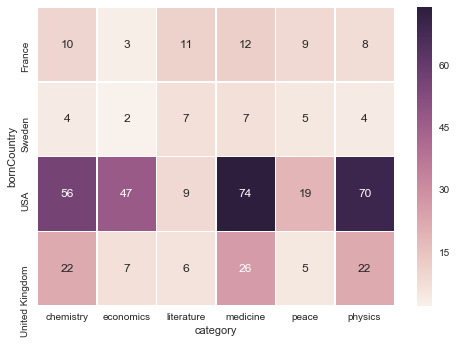

In [36]:
sns.heatmap(table,linewidths=.5, annot=True);

Violin plots can reveal trends (but are not very quantitative)

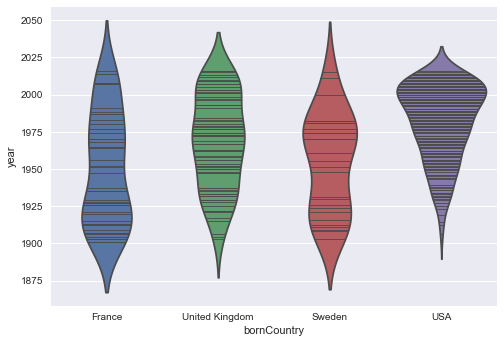

In [37]:
sns.violinplot(y="year", x="bornCountry",inner="stick", data=nobel2);

We can also use multiple conditions. Let's extract only physics prizes

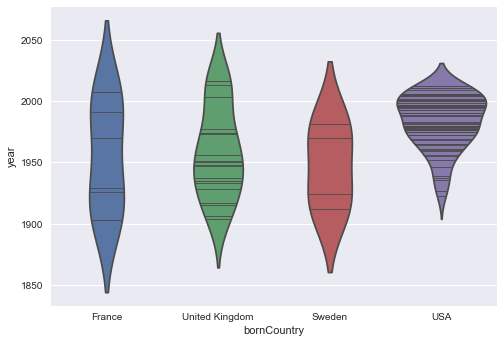

In [38]:
nobel3 = nobel.loc[nobel['bornCountry'].isin(countries) & nobel['category'].isin(['physics'])]
sns.violinplot(y="year", x="bornCountry",inner="stick", data=nobel3);

Swarmplots display categorical scatterplots with non-overlapping points

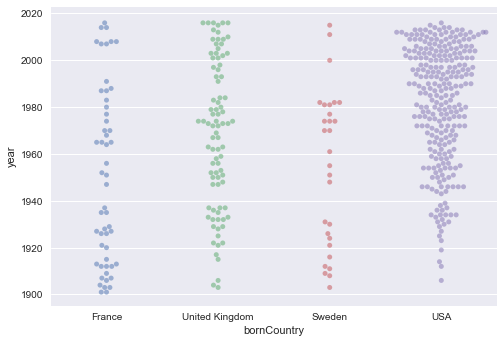

In [39]:
sns.swarmplot(y="year", x="bornCountry", data=nobel2, alpha=.5);

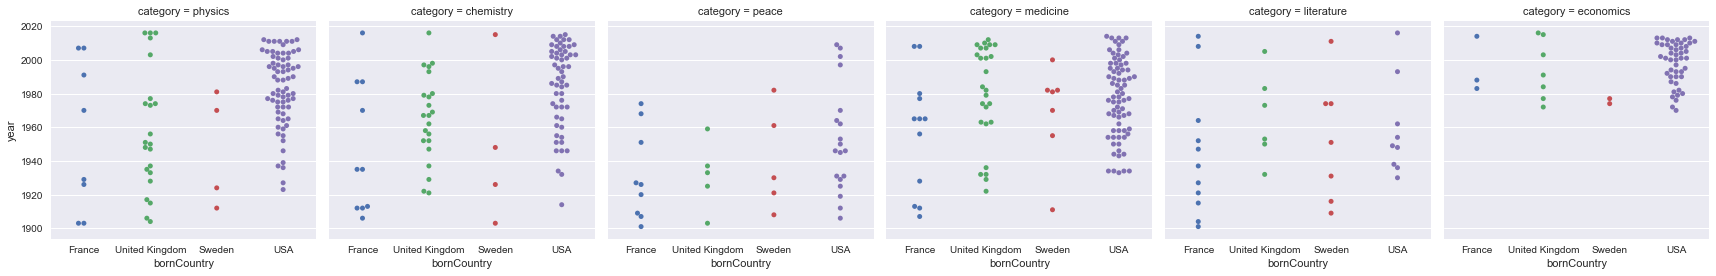

In [40]:
sns.factorplot(x="bornCountry", y="year", col="category", data=nobel2, kind="swarm");

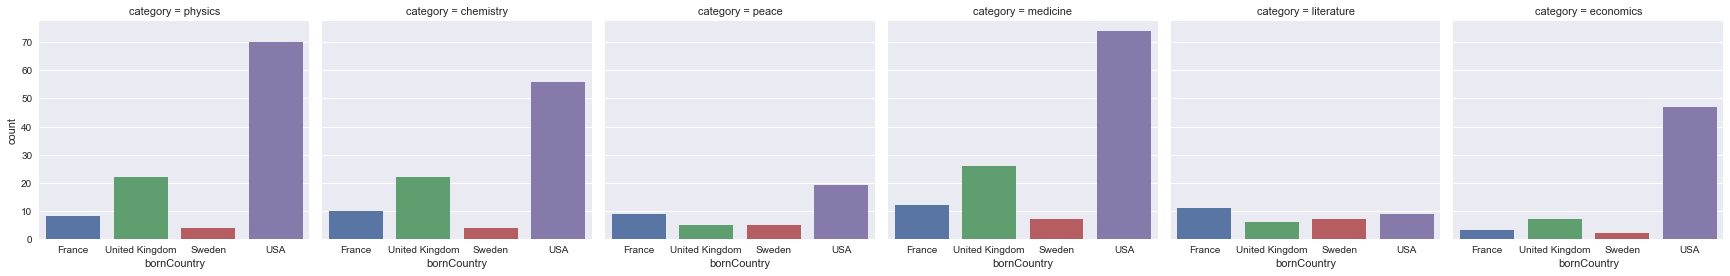

In [41]:
sns.factorplot(x="bornCountry", col="category", data=nobel2, kind="count");

Seaborn uses a variant of the The Grammar of Graphics, on which most famously simple graphics libraries are based. This is beyond the scope of this notebook though.

### Other visualization packages
* [Plotly](https://plot.ly/) - commercial online service for creating and sharing visualizations in notebooks
* [Bokeh](http://bokeh.pydata.org/en/latest/) - web-based, general-purpose and fast visualization toolkit
* [mpld3](http://mpld3.github.io/examples/index.html) - must be seen...

# Tidy Data

You may have observed that the data analysis seemed ridiculously easy in the example. This is in fact quite true, because the data was already **in the right format**.

It is said that 80% of a data analysts time is spent on the gritty details of understanding data and getting it  to the right format and the other 20% on the actual analysis.

Both Pandas in Python and the Tidyverse packages in R ascribe to the concept of **tidy** data as presented by Hadley Wickham. The original article on it can be found [here](https://www.jstatsoft.org/article/view/v059i10) and is worth a read.

To summarize data is tidy when

1. each variable forms a column
2. each observation forms a row
3. each type of observational unit forms a table

What an observation is and what a variable is depend on the semantics of the analytics question you are facing.


## Melting

Let's assume we have some run time statistics from a 1500 m running event.

| Runner   | 400m | 800m | 1200m | 1500m |
|----------|------|------|-------|-------|
| Runner 1 | 64   | 128  | 192   | 240   |
| Runner 2 | 80   | 160  | 240   | 300   |
| Runner 3 | 96   | 192  | 288   | 360   |

This is a classical table generated for displaying information. The issue here is that the column names 400m, 800m, 1200m and 1500m are, in fact variables.

To tidy the data we'd like it to be in the following format.

| Runner   | distance | time(s) |
|----------|----------|---------|
| Runner 1 | 400m     | 64      |
| Runner 1 | 800m     | 128     |
| ....     | ...      | ...     |

That way we can perform  aggregate operations on it, particularly we can **filter**  and **group** the data set. The data is also in a format where it is possible to model relationships between variables.

In [42]:
df = pd.DataFrame([
        {'Runner': 'Runner 1', 400: 64, 800: 128, 1200: 192, 1500: 240},
        {'Runner': 'Runner 2', 400: 80, 800: 160, 1200: 240, 1500: 300},
        {'Runner': 'Runner 3', 400: 96, 800: 192, 1200: 288, 1500: 360},
         ])
df

,400,800,1200,1500,Runner
0,64,128,192,240,Runner 1
1,80,160,240,300,Runner 2
2,96,192,288,360,Runner 3


In [43]:
df = pd.melt(df, id_vars="Runner", 
             value_vars=[400, 800, 1200, 1500], 
             var_name="distance", 
             value_name="time"
            )
df

,Runner,distance,time
0,Runner 1,400,64
1,Runner 2,400,80
2,Runner 3,400,96
3,Runner 1,800,128
4,Runner 2,800,160
5,Runner 3,800,192
6,Runner 1,1200,192
7,Runner 2,1200,240
8,Runner 3,1200,288
9,Runner 1,1500,240


Now, to e.g. compute the time spent on each interval, we c

In [44]:
df.sort_values("distance").groupby("Runner").time.diff()

0      NaN
1      NaN
2      NaN
3     64.0
4     80.0
5     96.0
6     64.0
7     80.0
8     96.0
9     48.0
10    60.0
11    72.0
Name: time, dtype: float64

## Merging

The database world has the concept of joins and tidy data sometimes needs to be joined as well to create a larger DataFrame with redundant data.

In Pandas the function to do this is called `merge`.

In [46]:
orders = pd.DataFrame([
        {"Person": "Dick", "Pizza": "Pepperoni"},
        {"Person": "Tom", "Pizza": "Hawaii"},
        {"Person": "Harry", "Pizza": "Capricciosa"}])

toppings = pd.DataFrame([
        {"Pizza": "Pepperoni", "Ingredient 1": "Pepperoni", "Ingredient 2": "Cheese"},
        {"Pizza": "Margherita", "Ingredient 1": "Cheese", "Ingredient 2": "Tomato"},
        {"Pizza": "Hawaii", "Ingredient 1": "Ham", "Ingredient 2": "Pineapple"},
        {"Pizza": "Capricciosa", "Ingredient 1": "Mushrooms", "Ingredient 2": "Ham"},
])
    

In [47]:
person_toppings = orders.merge(toppings, on="Pizza")
person_toppings

,Person,Pizza,Ingredient 1,Ingredient 2
0,Dick,Pepperoni,Pepperoni,Cheese
1,Tom,Hawaii,Ham,Pineapple
2,Harry,Capricciosa,Mushrooms,Ham


The default join type is an **inner** join. We could also do a **left**, **outer** or **right** join.

If the concepts are not familiar don't worry, you'll run across them sooner or later.

In [48]:
orders.merge(toppings, on="Pizza", how="outer")


,Person,Pizza,Ingredient 1,Ingredient 2
0,Dick,Pepperoni,Pepperoni,Cheese
1,Tom,Hawaii,Ham,Pineapple
2,Harry,Capricciosa,Mushrooms,Ham
3,NaN,Margherita,Cheese,Tomato


### <font color="red"> *Exercise 2.3* </font>
The abovementioned pizza data is not yet **tidy** because the column labels "Ingredient 1" and "Ingredient 2" are in fact priority values.

Make a tidy version of person_toppings. Who have ordered pizzas that have ham in it?

## Other concepts

This tutorial does not aim to be complete. We only have enough time to show you the way.

Other important concepts for tidying data are
* **splitting** data when a single column holds multiple variables
 * e.g. "male10-18" contains two variables, gender and age group
* parsing dates, timestamps and other nontrivial datums


## Other types of media

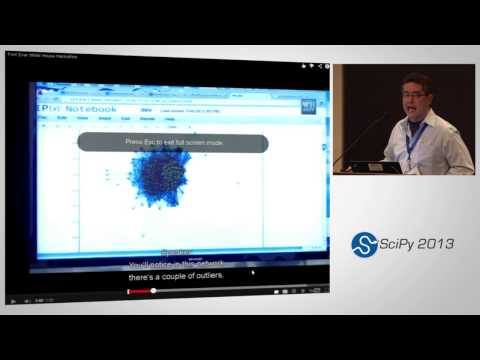

In [49]:
from IPython.display import YouTubeVideo
YouTubeVideo('j9YpkSX7NNM')

In [50]:
from IPython.display import Audio
Audio("data/GW150914_L1_whitenbp.wav")

In [51]:
from IPython.display import IFrame
IFrame("http://jupyter.org",width='100%',height=350)